## Tasks

- [ ] Establish whether training on orientation confuses with training on confused data as a follow up to last week's degrees of freedom discussion
- [x] Box plots (and update previous plots to reflect this)
- [ ] Plot the 2D orientation distribution of some clusters
- [ ] Percolation

### Confusion experiment

(scrambled = confused)

From the previous week, training a network on "black and white" data leads to no regression when predicting "color" data.
We now ask the question, had the "black and white" data contain "orientation" color instead, but the orientation is randomly
placed, rather than obtained from the evolution of the system, would it perform better when we predict "color"?

We can also compare this "confused" data to genuine "color" data (i.e. where the orientation comes from the dynamics of the
system). For this, we devise to experiments:

Hypothesis: Predicting genuine color data with a model trained on confused data should perform the same as predicting with
the same confused data. We expect this because we expect the orientation distribution for each to match (uniform between
1-4 up to normalization). We expect predicting confused data with a model trained on genuine color data would (1) yield worse
predictions (according to our metrics) **if** the orientation is picked up by the model as a property of the system (as patterns
of cluster formation, which hints at the tumbling rate), and (2) yield no improvement **if** the orientation is **not** picked up
by the model as a property the system.

- **Experiment 1a**: inject into the model information on the 4 degrees of freedom and predict with a dataset where the
    orientation is fully scrambled.
  - **Outcome:** 
  - **Models:** `magic7474`
- **Experiment 1b**: train only on scrambled/confused data and predict with a dataset where the orientation is genuine.
  - **Outcome:**
  - **Models:** `ring1111`

#### Plots for training with orientation

Trained on SGD, with a learning rate of 0.008, for 45 epochs.

In [1]:
#| code-fold: true
import os
os.chdir("/hades/projects/persistent-exclusion-process/")
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from src.training_utils import extract_floats, data_load, split_dataset, predict_and_plot

np.set_printoptions(precision=3, suppress=True)

2024-02-29 16:23:55.169805: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 16:23:55.169833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 16:23:55.170524: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 16:23:55.174791: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-29 16:23:55.712808: W tensorflow/compiler/tf2

**With the same data**

In [4]:
#| code-fold: true
x,y,shape = data_load(densities=[0.2], orientation=True)
_, _, x_val, y_val = split_dataset(x,y,last=int(len(x)*0.2))
name = "magic7474"
model = tf.keras.models.load_model(f"models/{name}.keras")

Number of unique alpha:  10
Shape of x:  (30000, 128, 128, 1)
Shape of y:  (30000,)
Size of training data:  24000
Size of validation data:  6000


188/188 [==============================] - 3s 15ms/step
Overlap ratio: 0.7
(Min, Max, Avg) STD: 0.0022823645 0.035767958 0.011195814
Pearson's correlation coeff:  0.9922203197613441
Overlap ratio: 0.7
(Min, Max, Avg) STD: 0.0022823645 0.035767958 0.011195814
Pearson's correlation coeff:  0.9922203197613441


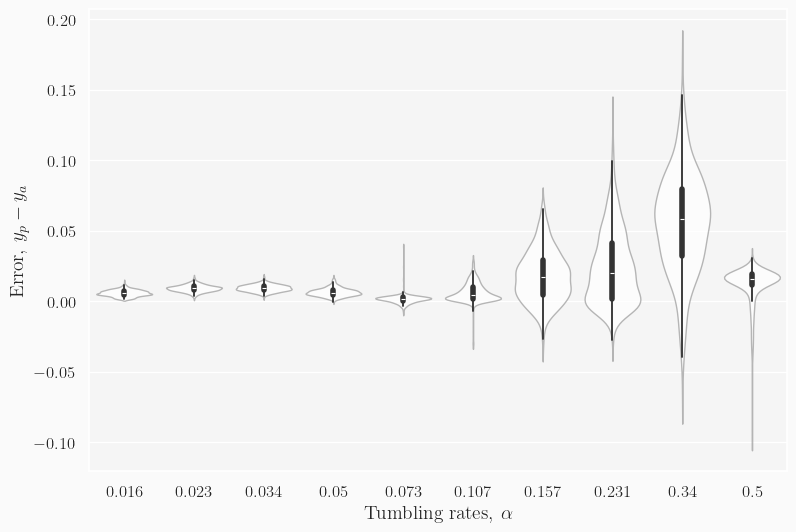

In [5]:
#| code-fold: true
predict_and_plot(model, x_val, y_val)

**Orientation scrambled**

25/25 [==============================] - 0s 16ms/step
Overlap ratio: 0.0
(Min, Max, Avg) STD: 0.0026376054 0.03763844 0.013460962
Pearson's correlation coeff:  0.9485194294783785
Overlap ratio: 0.0
(Min, Max, Avg) STD: 0.0026376054 0.03763844 0.013460962
Pearson's correlation coeff:  0.9485194294783785


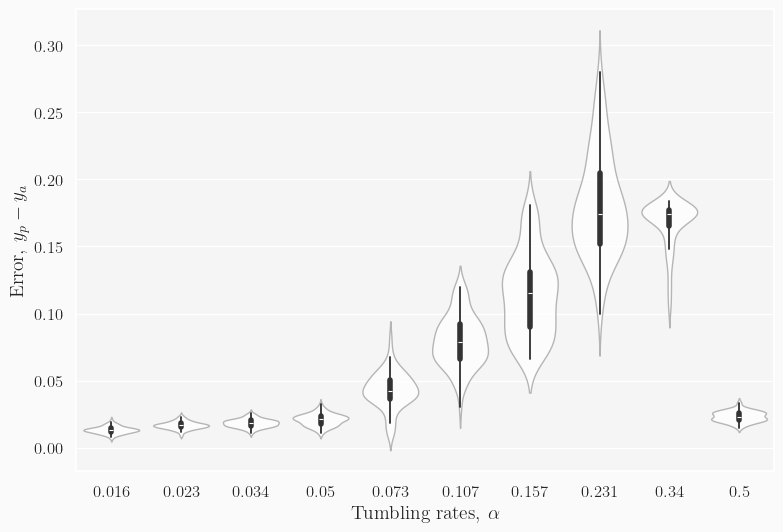

In [8]:
#| code-fold: true
del x,y,x_val,y_val
x,y,shape = data_load(densities=[0.2], orientation=False, scrambled=True)
predict_and_plot(model, x[:800], y[:800])

With orientation scrambled, the model trained on orientation seems to overpredict
the orientations, it seems to have gotten close for 0.5, but for the central $\alpha$'s,
it does very poorly.

#### Plots for training with confused data

**With the same data**

Number of unique alpha:  10
Shape of x:  (30000, 128, 128, 1)
Shape of y:  (30000,)
Size of training data:  24000
Size of validation data:  6000


2024-02-29 16:24:15.451320: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


188/188 [==============================] - 3s 15ms/step
Overlap ratio: 0.9
(Min, Max, Avg) STD: 1.8626451e-09 0.04303491 0.015331155
Pearson's correlation coeff:  0.9794483339595415
Overlap ratio: 0.9
(Min, Max, Avg) STD: 1.8626451e-09 0.04303491 0.015331155
Pearson's correlation coeff:  0.9794483339595415


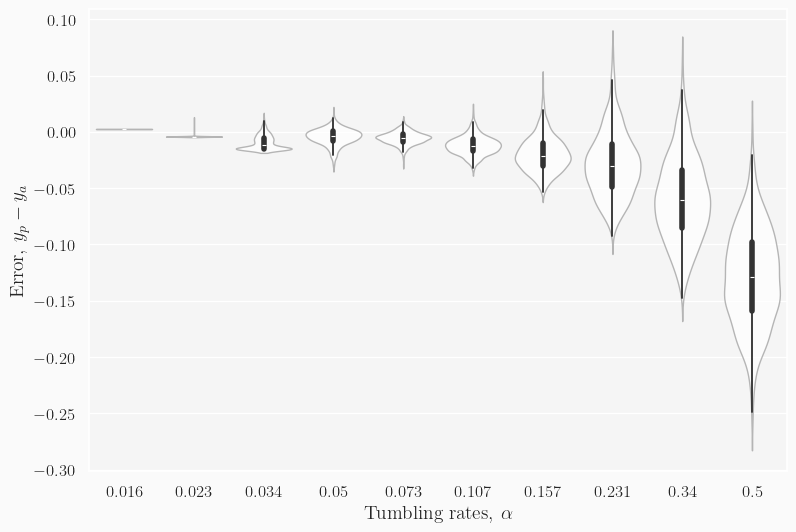

In [2]:
#| code-fold: true
x,y,shape = data_load(densities=[0.2], orientation=False, scrambled=True)
_, _, x_val, y_val = split_dataset(x,y,last=int(len(x)*0.2))
name = "ring1111"
model = tf.keras.models.load_model(f"models/{name}.keras")
predict_and_plot(model, x_val, y_val)

**With data with genuine orientation**

25/25 [==============================] - 0s 15ms/step
Overlap ratio: 0.8
(Min, Max, Avg) STD: 1.8626451e-09 0.03673462 0.014396628
Pearson's correlation coeff:  0.9799307539609515
Overlap ratio: 0.8
(Min, Max, Avg) STD: 1.8626451e-09 0.03673462 0.014396628
Pearson's correlation coeff:  0.9799307539609515


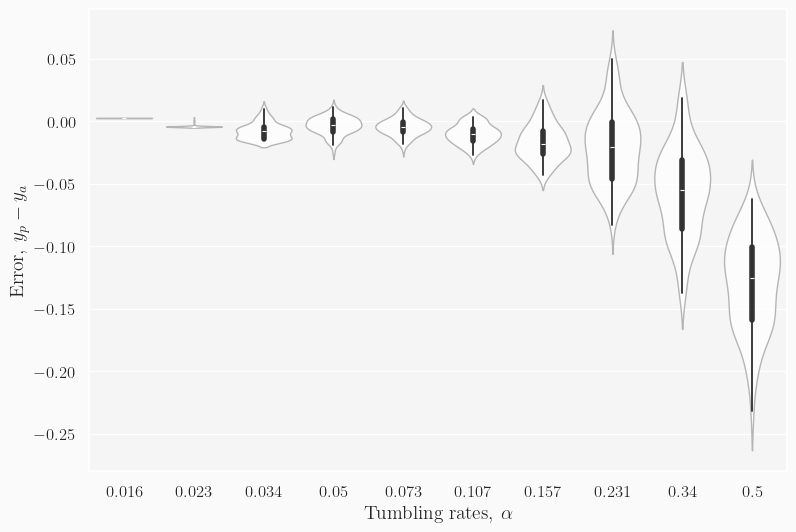

In [3]:
del x,y,x_train,y_train,x_val,y_val
x,y,shape = data_load(densities=[0.2], orientation=True, scrambled=False)
predict_and_plot(model, x[:800], y[:800])